# Distance analysis 

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

Cual es una distancia aceptable para movilizarse en la ciudad?

Podemos considerar los datos estadisticos de viajes

In [5]:
duracion = pd.read_csv('../data/01_raw/movilidad/Aux_DuraciónEODH2019.csv', sep=';')

In [10]:
duracion.groupby('modo_principal').agg({'f_exp':'sum'})

,f_exp
modo_principal,
A pie,6.941798e+06
Alimentador,2.743405e+05
Auto,2.291877e+06
Bicicleta,1.177868e+06
Bicitaxi,2.937985e+04
Cable,9.491226e+02
Intermunicipal,3.535298e+05
Moto,9.153139e+05
Otro,2.199062e+05


sacamos el promedio de tiempo de viaje en bicicleta

In [43]:
duracion_bicicleta = (duracion.
                      loc[lambda x:x.modo_principal=='Bicicleta'])
duracion_bicicleta.head()

,id_hogar,id_persona,id_viaje,hora_inicio_viaje,p31_hora_llegada,f_exp,modo_principal,duracion
16,33018,6,3,21:10,21:50,15.567379,Bicicleta,40
21,12861,1,3,11:30,12:00,169.599720,Bicicleta,30
23,32344,2,3,11:55,12:10,137.201398,Bicicleta,15
33,30732,2,4,18:00,18:30,144.248045,Bicicleta,30
43,5636,4,2,11:14,11:20,184.877469,Bicicleta,6


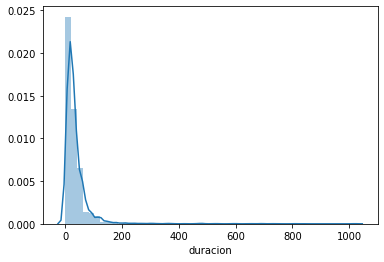

In [44]:
sns.distplot(duracion_bicicleta.duracion)

Parece que hay otliers fuertes, vamos a quedarnos con solo el 95% de los datos

In [45]:
q_95 = duracion_bicicleta.duracion.quantile(q=0.95)
q_95

90.0

In [46]:
duracion_bicicleta = duracion_bicicleta.loc[lambda x: x.duracion < q_95]

In [47]:
duracion_bicicleta.agg({'duracion': ['mean', 'median']})

,duracion
mean,26.08018
median,20.00000


In [48]:
# quantiles
duracion_bicicleta.duracion.quantile(q=np.linspace(0,1,11))

0.0     0.0
0.1     7.0
0.2    10.0
0.3    15.0
0.4    15.0
0.5    20.0
0.6    30.0
0.7    30.0
0.8    40.0
0.9    60.0
1.0    87.0
Name: duracion, dtype: float64

dejar una duracion promedio de 26 minutos parece sensato. No obstante para entender el maximo de km que podrian hacerse en bicicletas, usaremos el valor __90 min (1.5h)__ del cuantil de la distribucion original, que ademas es bastante cercano al valor maximo de esta distribucion

Suponiendo que una bicicleta se mueve a 5 km/h incluyendo trafico, etc, esto significa que en promedio una persona puede moverse: 

In [52]:
velocidad = 5
tiempo_horas = 1.5
distancia_max = velocidad*tiempo_horas

distancia_max

7.5

7.5 km fuera del radio del hospital. Este seria el radio max que la iniciativa de bicicletas podria cubrir